#### Name: AkhayTemak

# Graduate Rotational Internship Program 
@ The Sparks Foundation

# Task-2 -To Explore Supervised Machine Learning

**Problem Statement:**
Given Task-What will be predicting score if a student study for 9.25 hrs in a day?

# Simple Linear Regression 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Import Libraries**

In [36]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

**Reading data**

In [37]:
path = "http://bit.ly/w-data"
data_set = pd.read_csv(path)
print("data_set")

data_set.head(10)

data_set


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Basic Statistics of the data#

In [38]:
print(data_set.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


# Visualization#

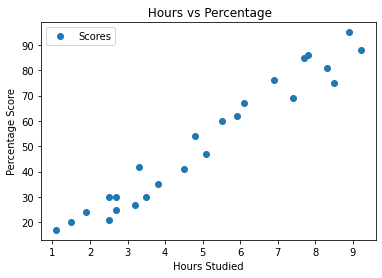

In [39]:
# Plotting the distribution of scores
data_set.plot(x='Hours', y='Scores', style='o')  
plt.title(' Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

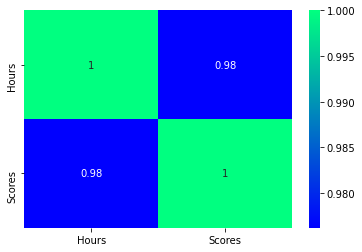

In [40]:
import seaborn as sns
corr=data_set.corr()
sns.heatmap(corr,annot=True,cmap='winter')
plt.show()

**From above heatmap show the correlation between Hours and Scores **

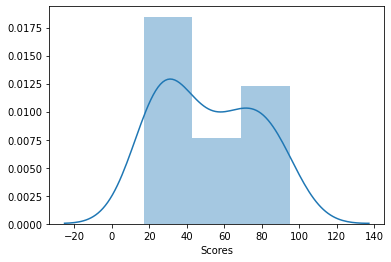

In [41]:
#plotting the distribution of scores
sns.distplot(data_set['Scores'])

# Preparing the data#
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [42]:
X = data_set.iloc[:, :-1].values  
y = data_set.iloc[:, 1].values  

# Splitting the data into training and testing#

To split the data 80% as training data and 20% as testing data with fix random state= 0. 

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

To train the model on 80% data 

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


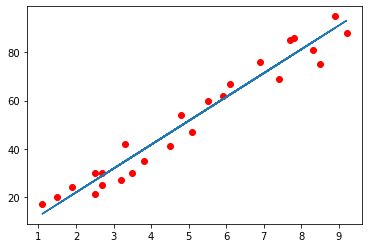

In [45]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line);
plt.show()

##  Making Predictions#

In [46]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Scores')

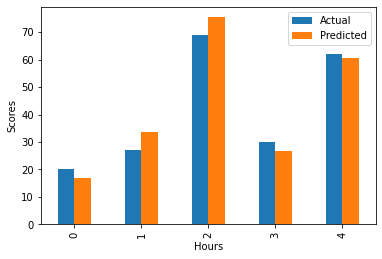

In [48]:
df.plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel('Scores')

### Here we have to predict score if student study for 9.25 hrs in a day

In [0]:
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Conclusion: In above analysis we conclude that student they studied for 9.25 hrs to get the 93.69173 percentage of marks.

## Evaluating the Model Accuracy



Using Mean Square Error and R-square

In [0]:
# mean Sqare Error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [50]:
#R-square value
from scipy import stats
slope,intercept,r,p,std_err=stats.linregress(y_test,y_pred)
print('R-squared Value:',r)

R-squared Value: 0.9806835759589493


### Here R-squared value is 98%, means that model explains 98% of the variability in the dependent variable by the independent variable.


### Thank You